In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
canser = load_breast_cancer()

In [7]:
canser.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [18]:
print(canser.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [35]:
canser['data'][0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [36]:
df_feat = pd.DataFrame(canser['data'], columns=canser['feature_names'])

In [37]:
df_feat.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [38]:
canser['target_names']

array(['malignant', 'benign'], dtype='<U9')

# Explore the data

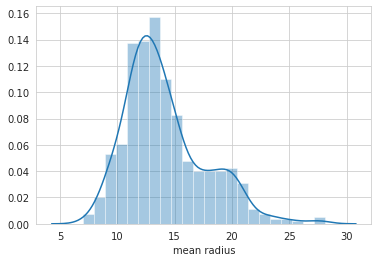

In [41]:
sns.set_style('whitegrid')
sns.distplot(df_feat['mean radius'])

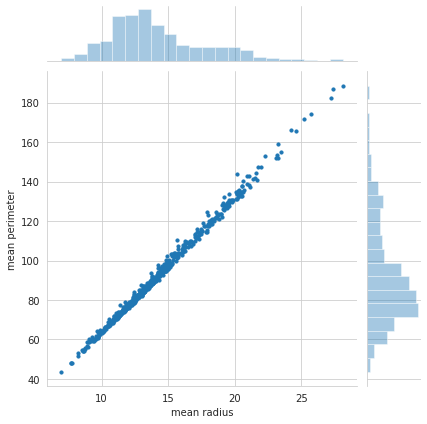

In [44]:
sns.jointplot(x='mean radius', y='mean perimeter', data=df_feat, s=10)

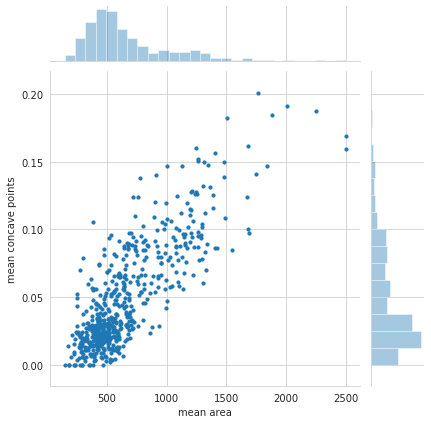

In [47]:
sns.jointplot(x='mean area', y='mean concave points', data=df_feat, s=10)

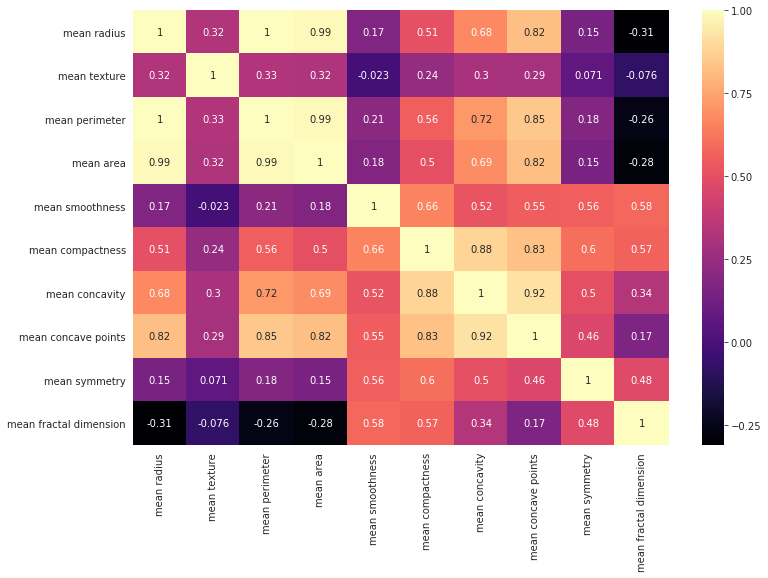

In [71]:
plt.figure(figsize=(12,8))
sns.heatmap(data=df_feat[df_feat.columns[:10]].corr(), cmap='magma', annot=True)

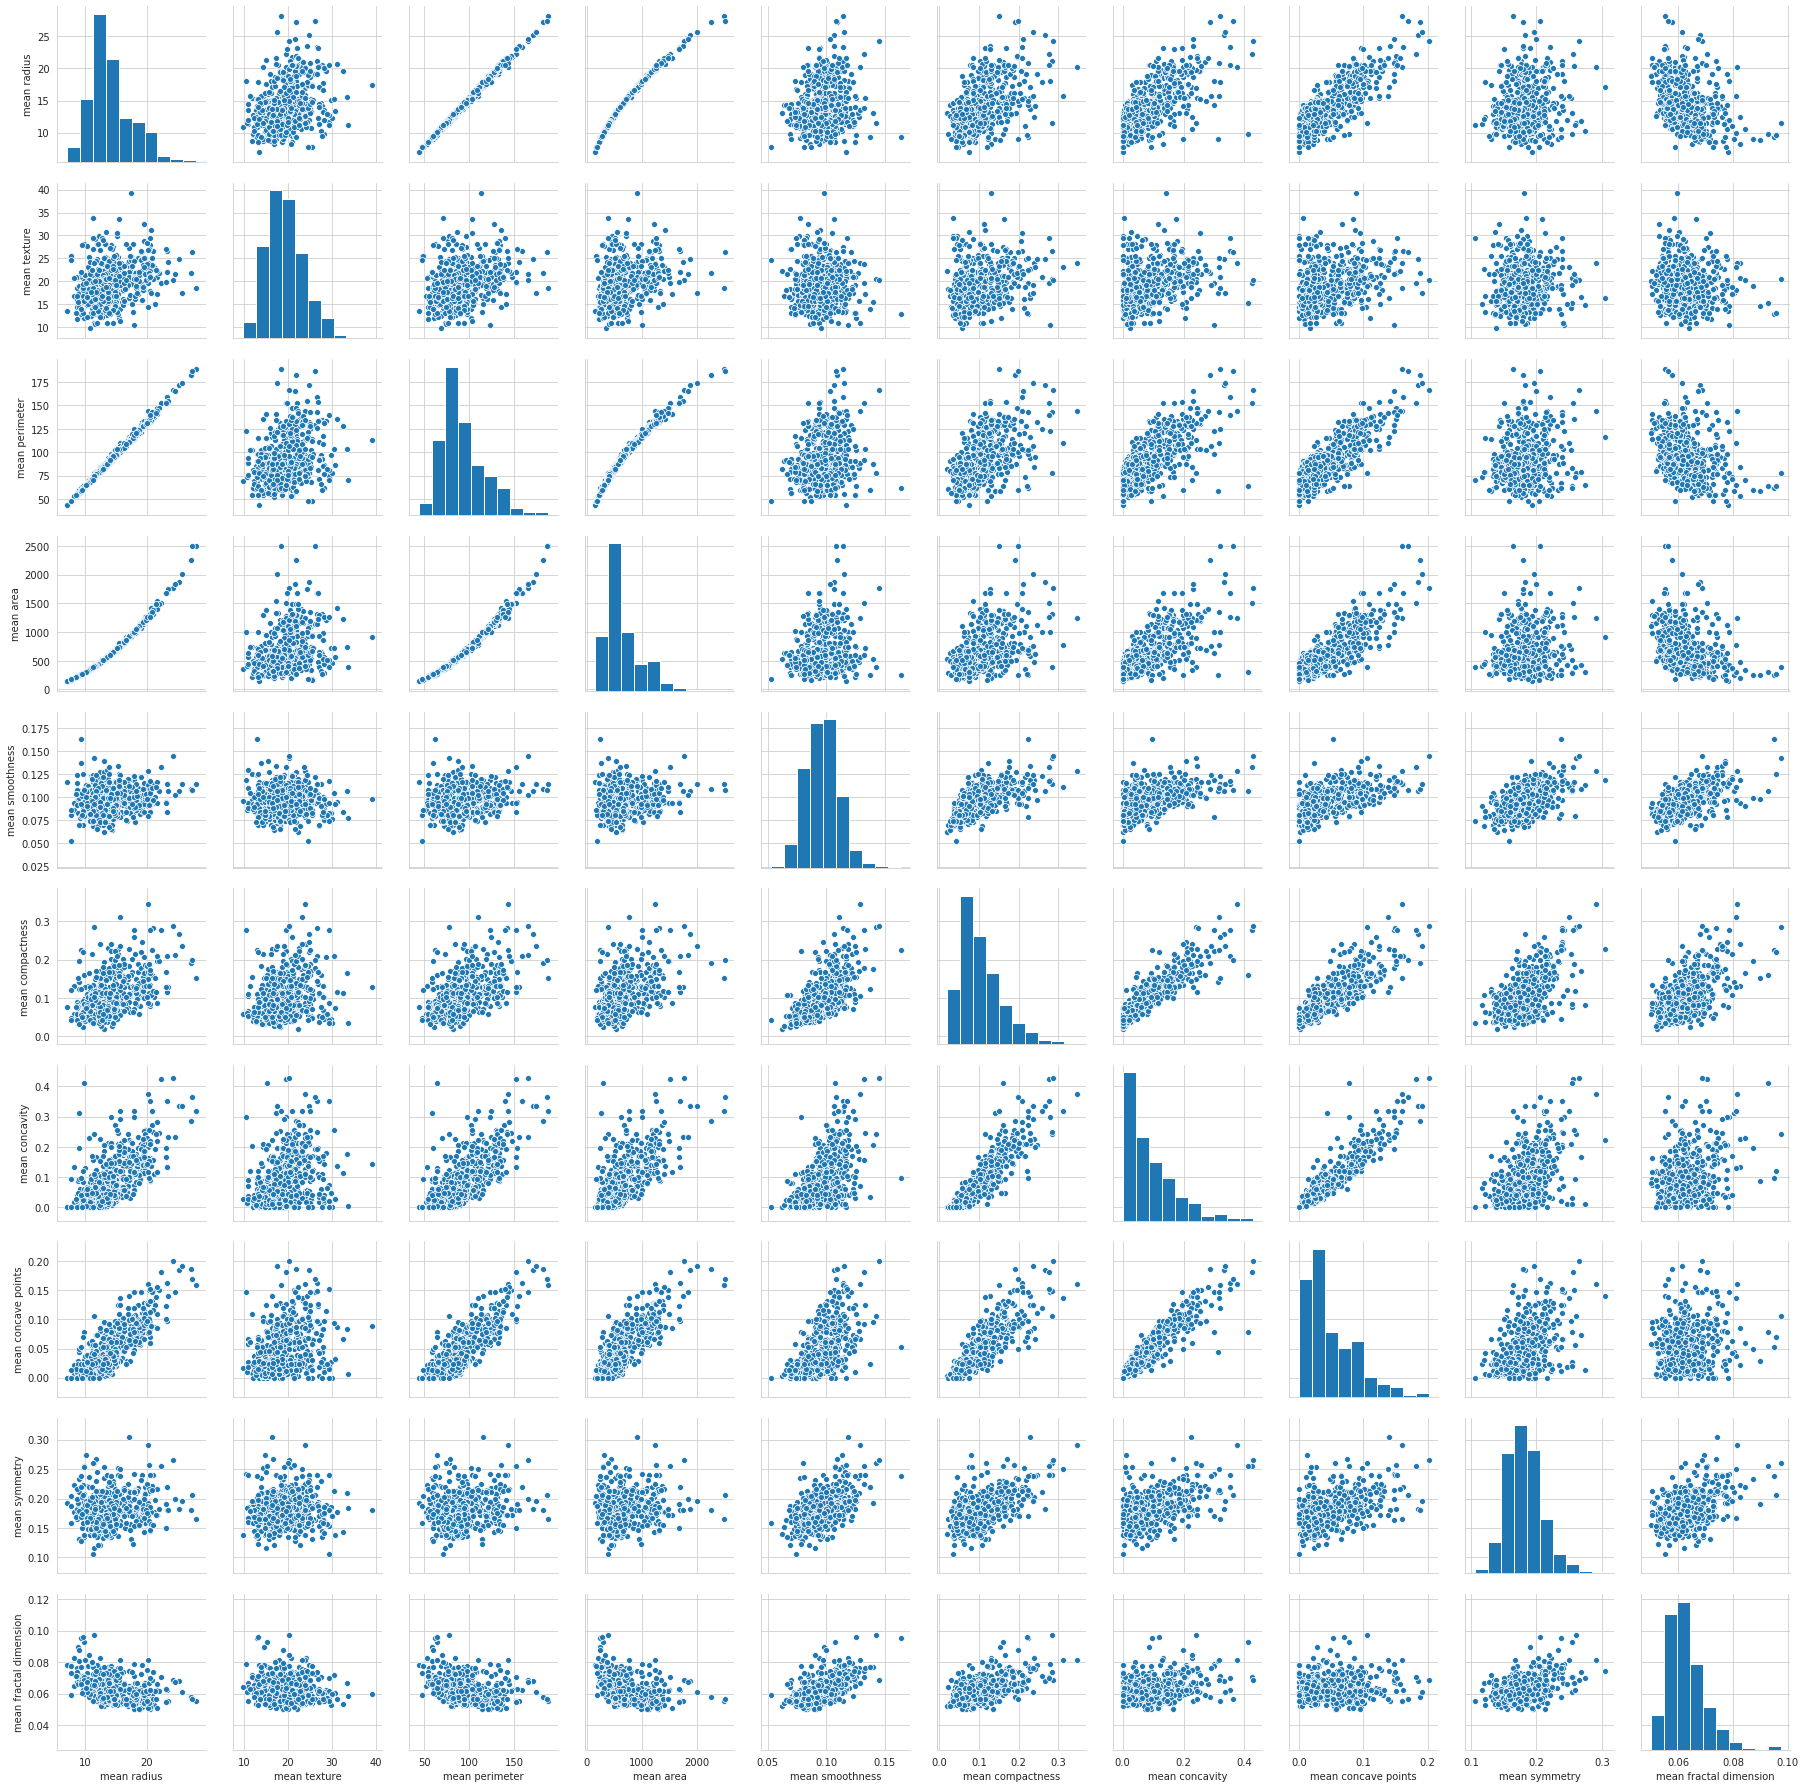

In [84]:
sns.pairplot(data=df_feat[df_feat.columns[:10]])

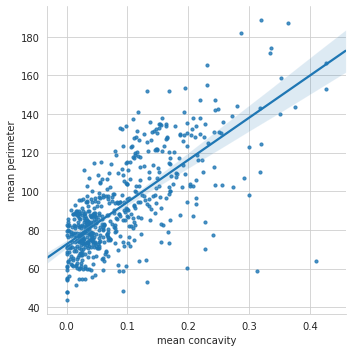

In [106]:
sns.lmplot(x='mean concavity',
           y='mean perimeter',
           data=df_feat,
           scatter_kws={'s':10})

# Add the target as column to hue the plots accordingly

In [122]:
canser['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [125]:
dmap = {0:'malignant', 1:'benign'}

In [127]:
df_feat.insert(len(df_feat.columns), 'target names', list(canser['target']))

In [129]:
df_feat['target names'] = df_feat['target names'].map(dmap)

In [130]:
df_feat.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target names
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


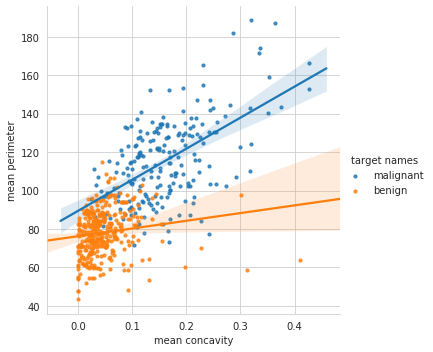

In [132]:
sns.lmplot(x='mean concavity',
           y='mean perimeter',
           data=df_feat,
           hue='target names',
           scatter_kws={'s':10})

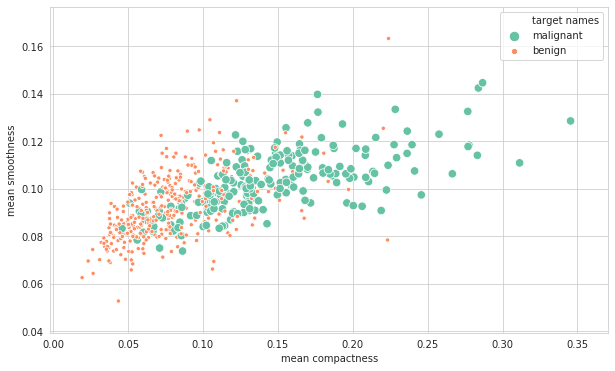

In [134]:
plt.figure(figsize=(10,6))
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)

ax = sns.scatterplot(x="mean compactness", y="mean smoothness",
                     hue="target names", 
                     size="target names",
                     palette="Set2",
                     data=df_feat)

In [137]:
df_feat['target names'].value_counts()

benign       357
malignant    212
Name: target names, dtype: int64

In [158]:
by_target = df_feat.groupby('target names')
by_target.describe().transpose()

target names                       benign   malignant
mean radius             count  357.000000  212.000000
                        mean    12.146524   17.462830
                        std      1.780512    3.203971
                        min      6.981000   10.950000
                        25%     11.080000   15.075000
...                                   ...         ...
worst fractal dimension min      0.055210    0.055040
                        25%      0.070090    0.076302
                        50%      0.077120    0.087600
                        75%      0.085410    0.102625
                        max      0.148600    0.207500

[240 rows x 2 columns]

In [167]:
by_target.max().transpose()

target names,benign,malignant
mean radius,17.85000,28.11000
mean texture,33.81000,39.28000
mean perimeter,114.60000,188.50000
mean area,992.10000,2501.00000
mean smoothness,0.16340,0.14470
mean compactness,0.22390,0.34540
mean concavity,0.41080,0.42680
mean concave points,0.08534,0.20120
mean symmetry,0.27430,0.30400
mean fractal dimension,0.09575,0.09744


In [172]:
by_target.describe().transpose().xs('mean radius', level=0)

target names,benign,malignant
count,357.000000,212.000000
mean,12.146524,17.462830
std,1.780512,3.203971
min,6.981000,10.950000
25%,11.080000,15.075000
50%,12.200000,17.325000
75%,13.370000,19.590000
max,17.850000,28.110000


In [189]:
by_target.describe().transpose().xs('mean', level=-1)['benign'].nlargest(5)

worst area         558.899440
mean area          462.790196
worst perimeter     87.005938
mean perimeter      78.075406
worst texture       23.515070
Name: benign, dtype: float64

# Split the data

In [190]:
from sklearn.model_selection import train_test_split

In [191]:
X = df_feat.drop('target names', axis=1)
y = canser['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Fit and Predictions

In [192]:
from sklearn.svm import SVC

In [193]:
model = SVC()

In [194]:
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [196]:
predictions = model.predict(X_test)

In [197]:
from sklearn.metrics import classification_report, confusion_matrix

In [198]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90        66
           1       0.91      0.97      0.94       105

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171

[[ 56  10]
 [  3 102]]


# Optimization of model with GridSearch

In [199]:
from sklearn.model_selection import GridSearchCV

In [200]:
param_grid = {'C':[0.1,1,10,100,1000], 'gamma':[1,0.1,0.01,0.001,0.0001]}

In [201]:
grid = GridSearchCV(SVC(),param_grid, verbose=3)

In [203]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.637, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.637, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.625, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.633, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.633, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.637, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........................ C=1, gamma=1, score=0.637, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.637, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.625, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.633, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.633, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=0.637, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=0.637, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] .

[CV] ..................... C=1000, gamma=1, score=0.633, total=   0.0s
[CV] C=1000, gamma=1 .................................................
[CV] ..................... C=1000, gamma=1, score=0.633, total=   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ................... C=1000, gamma=0.1, score=0.637, total=   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ................... C=1000, gamma=0.1, score=0.637, total=   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ................... C=1000, gamma=0.1, score=0.625, total=   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ................... C=1000, gamma=0.1, score=0.633, total=   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ................... C=1000, gamma=0.1, score=0.633, total=   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    1.0s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [204]:
grid.best_params_

{'C': 1, 'gamma': 0.0001}

In [205]:
grid.best_estimator_

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [206]:
grid_predictions = grid.predict(X_test)

In [207]:
print(confusion_matrix(y_test, grid_predictions))
print(classification_report(y_test, grid_predictions))

[[ 59   7]
 [  4 101]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        66
           1       0.94      0.96      0.95       105

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171

